In [54]:
%load_ext autoreload
%autoreload 2

import os
import torch
import torch.nn as nn

import networks
from process_data import gen_loader, process_load_data
from train_test import train, test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Process and load the audio files
src_dir = os.getcwd()+'\AudioMNIST\AudioMNIST\data'
dst_dir = os.getcwd()+'\ProcessedData'
dataset, labels = process_load_data(src_dir,dst_dir, input_type="spectro")

Classes: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [44]:
# Create the dataloaders
train_loader, val_loader, test_loader = gen_loader(dataset,train_split=0.8, val_split= 0.1, test_split= 0.1, length = 40)

# of batches in training dataloader: 1500
# of batches in val dataloader: 188
# of batches in test dataloader: 188


Epoch 2: Train Risk = 0.279, Train Accuracy 0.911,                   Validation Risk = 0.166, Validation Accuracy 0.945
Epoch 4: Train Risk = 0.195, Train Accuracy 0.939,                   Validation Risk = 0.099, Validation Accuracy 0.968
Epoch 6: Train Risk = 0.167, Train Accuracy 0.949,                   Validation Risk = 0.146, Validation Accuracy 0.958
Epoch 8: Train Risk = 0.175, Train Accuracy 0.948,                   Validation Risk = 0.090, Validation Accuracy 0.976
Epoch 10: Train Risk = 0.136, Train Accuracy 0.959,                   Validation Risk = 0.096, Validation Accuracy 0.971


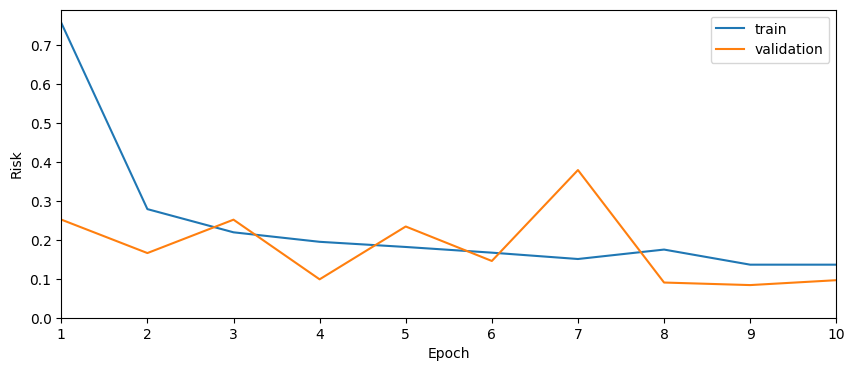

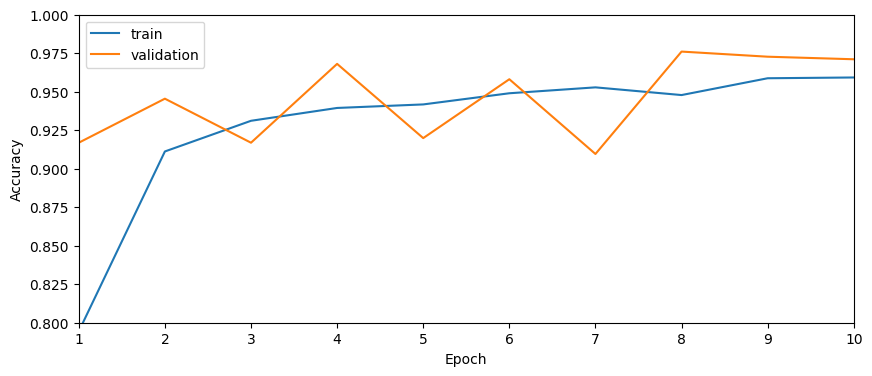

In [18]:
my_FNN = networks.MLP(num_classes=10)
loss_fn = nn.CrossEntropyLoss()
train_risk, val_risk, val_accuracy = train(model=my_FNN, train_loader=train_loader, val_loader=val_loader, num_epochs=10, lr=0.001, loss_fn = loss_fn )

In [19]:
loss_fn = nn.CrossEntropyLoss()
test_risk, test_accuracy = test(my_FNN, test_loader, loss_fn)
print(f'Test Risk = {test_risk:.3f}, Test Accuracy {test_accuracy:.3f}')

Test Risk = 0.121, Test Accuracy 0.965


Epoch 2: Train Risk = 0.042, Train Accuracy 0.988,                   Validation Risk = 0.067, Validation Accuracy 0.982
Epoch 4: Train Risk = 0.020, Train Accuracy 0.994,                   Validation Risk = 0.016, Validation Accuracy 0.996
Epoch 6: Train Risk = 0.013, Train Accuracy 0.996,                   Validation Risk = 0.016, Validation Accuracy 0.996
Epoch 8: Train Risk = 0.010, Train Accuracy 0.997,                   Validation Risk = 0.018, Validation Accuracy 0.996
Epoch 10: Train Risk = 0.009, Train Accuracy 0.997,                   Validation Risk = 0.020, Validation Accuracy 0.994


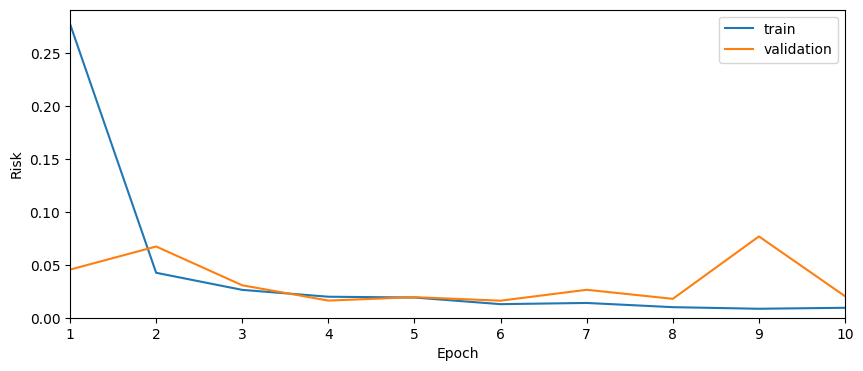

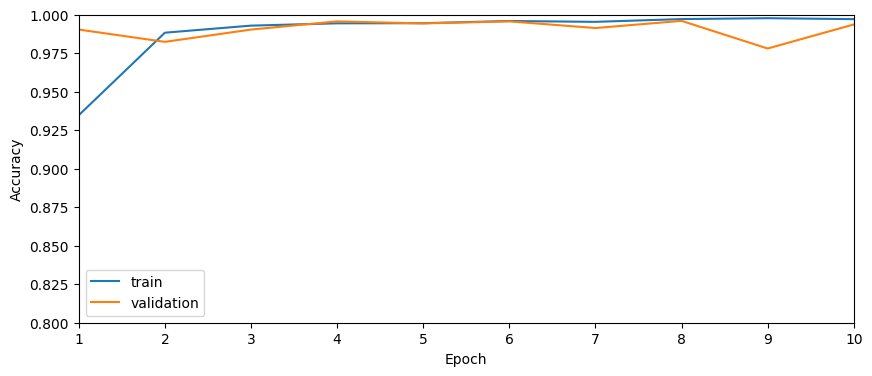

In [4]:
# Try CNN model
my_CNN = networks.ConvNet(num_classes=10, net_width=16, net_depth=3, net_act='relu', net_norm='batchnorm', net_pooling='maxpooling', in_size = 40)
loss_fn = nn.CrossEntropyLoss()
train_risk, val_risk, val_accuracy = train(model=my_CNN, train_loader=train_loader, val_loader=val_loader, num_epochs=10, lr=0.001, loss_fn = loss_fn )

In [21]:
loss_fn = nn.CrossEntropyLoss()
test_risk, test_accuracy = test(my_CNN, test_loader, loss_fn)
print(f'Test Risk = {test_risk:.3f}, Test Accuracy {test_accuracy:.3f}')

Test Risk = 0.030, Test Accuracy 0.991


In [49]:
# Create the dataloaders
train_loader, val_loader, test_loader = gen_loader(dataset,train_split=0.8, val_split= 0.1, test_split= 0.1)

# of batches in training dataloader: 1500
# of batches in val dataloader: 188
# of batches in test dataloader: 188


Epoch 2: Train Risk = 0.105, Train Accuracy 0.972,                   Validation Risk = 0.048, Validation Accuracy 0.989
Epoch 4: Train Risk = 0.046, Train Accuracy 0.987,                   Validation Risk = 0.037, Validation Accuracy 0.990
Epoch 6: Train Risk = 0.037, Train Accuracy 0.990,                   Validation Risk = 0.041, Validation Accuracy 0.988
Epoch 8: Train Risk = 0.022, Train Accuracy 0.994,                   Validation Risk = 0.016, Validation Accuracy 0.995
Epoch 10: Train Risk = 0.020, Train Accuracy 0.995,                   Validation Risk = 0.021, Validation Accuracy 0.992


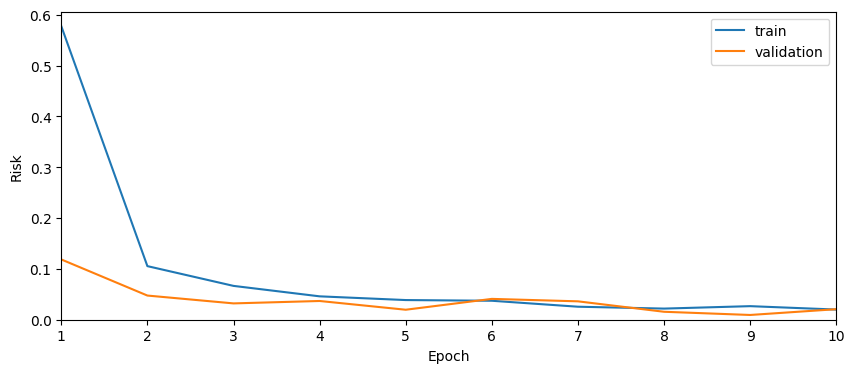

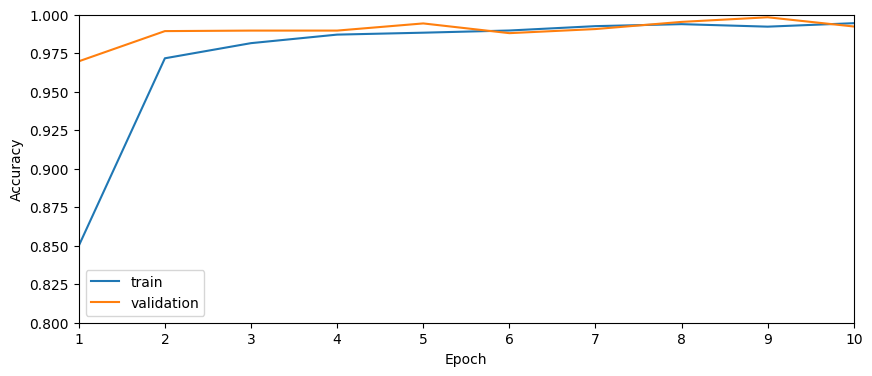

In [18]:
# Try ConvToLSTMNet model
model = networks.ConvToLSTMNet(num_classes=10, cnn_width=16, cnn_depth=3, cnn_act='relu', cnn_norm='batchnorm', cnn_pooling='maxpooling', lstm_width=16, lstm_depth=1, in_size = 40)
loss_fn = nn.CrossEntropyLoss()
train_risk, val_risk, val_accuracy = train(model=model, train_loader=train_loader, val_loader=val_loader, num_epochs=10, lr=0.001, loss_fn = loss_fn )

In [16]:
loss_fn = nn.CrossEntropyLoss()
test_risk, test_accuracy = test(model, test_loader, loss_fn)
print(f'Test Risk = {test_risk:.3f}, Test Accuracy {test_accuracy:.3f}')

NameError: name 'model' is not defined

In [57]:
for (audio, _) in test_loader:
    audio = audio.to('cuda')
    model.visualize(audio[0].unsqueeze(0))
    outputs = model(audio)
    softmax = torch.nn.Softmax(dim=1)
    predicted_probs = softmax(outputs)
    predicted_class = torch.argmax(predicted_probs,dim =1)
    print(predicted_class[0])
    break

(5, 16, 1)
torch.Size([1, 16])
(1, 16)
tensor(7, device='cuda:0')
